# Upper Confidence Boundry Algorithm to Analyze Multi-Armed Bandits

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class UCBModel:
    def __init__(self, processSpace, upperBound, explorationFactor, distributionType):
        self.processSpace = processSpace
        self.upperBound = upperBound
        self.explorationFactor = explorationFactor
        self.distributionType = distributionType
        self.decisionTime = 0 
        self.visitList = np.ones(self.processSpace) # count visits to each machines
        self.costMat = [] #store all the costs for every decisions        
        self.costAveList = np.zeros(self.processSpace)
    
    def randSimulation(self, index):
        if self.distributionType is 'Bernoulli':
            return np.random.binomial(1,(index+1)/(self.processSpace+1))
        elif self.distributionType is 'Gaussian':
            return np.random.normal(index+1,index+1,1)   
        
    def rewardSim(self,candidates):
        costList = np.zeros(self.processSpace)
        for i in candidates:
            costList[i] = self.randSimulation(i)
        self.costMat.append(costList)
        
    def initStep(self):
        self.rewardSim(range(self.processSpace))
        self.choice = self.costMat[-1].argmax()
        self.costAveList = self.costMat[-1]
        self.visitList[self.choice] += 1
        self.decisionTime += self.processSpace
        self.costAveList = self.costMat[0]

    def samplingStep(self):
        self.decisionTime += 1
        e = self.upperBound*np.sqrt(self.explorationFactor*np.log(self.decisionTime)/self.visitList)
        self.choice = np.argmax(self.costAveList+e)
        self.visitList[self.choice] += 1
        costList = np.zeros(self.processSpace)
        costList[self.choice] = self.randSimulation(self.choice)
        self.costMat.append(costList)
        summedCost = np.sum(np.array(self.costMat),0)
        self.costAveList = summedCost/self.visitList     
        
    def visitBoundCalculation(self):
        b1 = 4*(self.upperBound**2)/((self.processSpace-np.arange(self.processSpace)-1)**2)
        b2 = self.explorationFactor*np.log(self.decisionTime)
        b3 = 3/2+1/2/(self.explorationFactor-1)
        self.visitBound = b1*b2+b3

## Practice with Gaussian Machines
The i-th machine produces a Gaussian rv with mean i and std i

[  21.   26.   29.   32.   35.   71.   69.  126.  167.  435.]
2022.84485084


<Container object of 10 artists>

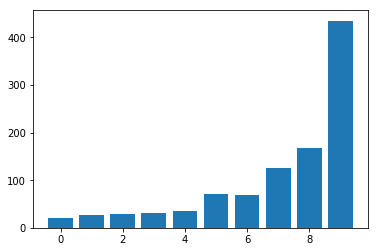

In [162]:
iterNum = 1000
ucbModel = UCBModel(10,upperBound=20,explorationFactor=1.01,distributionType='Gaussian')
ucbModel.initStep()
for i in range(1000):
    ucbModel.samplingStep()
print(ucbModel.visitList)
regret = ucbModel.decisionTime*10-np.sum(np.array(ucbModel.costMat))
print(regret)
plt.bar(range(ucbModel.processSpace),ucbModel.visitList)

In [163]:
ucbModel.visitBoundCalculation()
print(ucbModel.visitBound-ucbModel.visitList)

[   168.5124971     200.17206665    250.64310746    330.02811849
    463.66049062    679.18826659   1224.61247394   2720.25306637
  11063.51226549             inf]


/Users/Ricardo/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


## Practice with Bernoulli Machines
The i-th Machine generates a Bernoulli rv with probability of <latex>$\frac{i}{num-of-machines}$<latex>

[   8.   11.   25.   25.   19.   40.   74.  177.  631.]
99.1


<Container object of 9 artists>

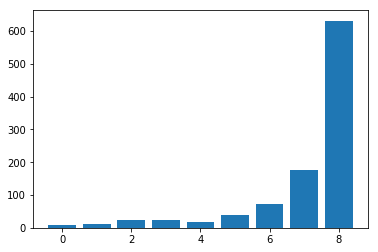

In [7]:
iterNum = 1000
ucbModel = UCBModel(9,upperBound=1,explorationFactor=1.01,distributionType='Bernoulli')
ucbModel.initStep()
for i in range(1000):
    ucbModel.samplingStep()
print(ucbModel.visitList)
regret = ucbModel.decisionTime*ucbModel.processSpace/(1+ucbModel.processSpace)-np.sum(np.array(ucbModel.costMat))
print(regret)
plt.bar(range(ucbModel.processSpace),ucbModel.visitList)

In [6]:
totalCost = np.sum(np.array(ucbModel.costMat))
print(totalCost)

813.0
